In [2]:
s2_path <- readLines("s2_shared_path.txt")

🌟 Stars: 14.675 seg | mean = 3766.625 


downsample set to 21



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2630490,140.5,5033500,268.9,4762497,254.4
Vcells,125168323,955.0,562255232,4289.7,677705767,5170.5


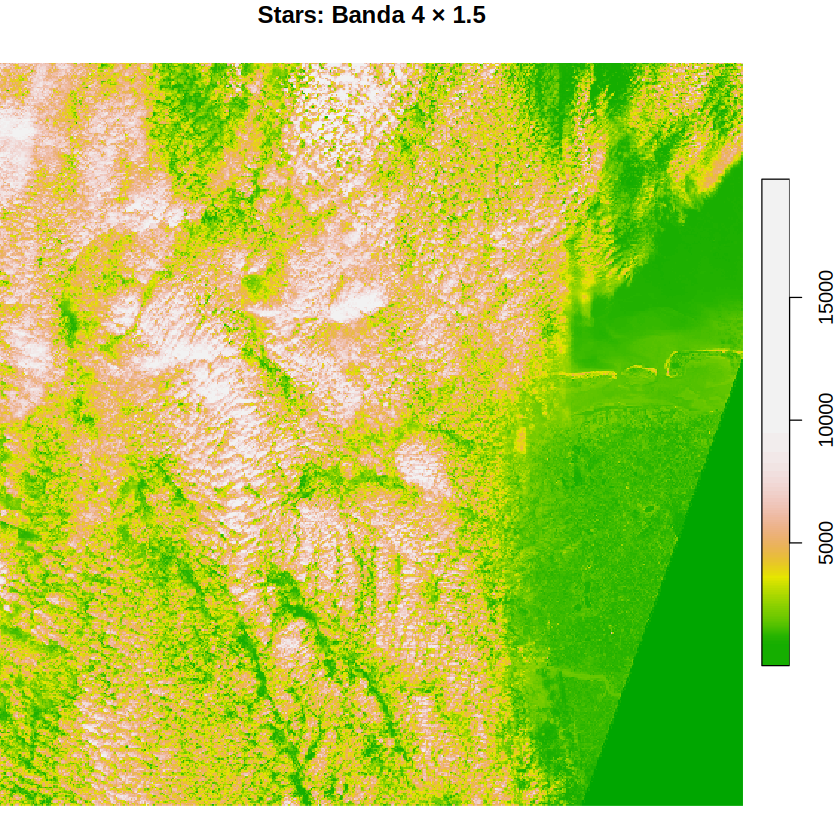

In [3]:
# Código en R
library(stars)

# ------------------------------------------------
# 0. Inicio del cronómetro
# ------------------------------------------------
t0 <- Sys.time()

# ------------------------------------------------
# 1. Leer raster como proxy (NO RAM)
# ------------------------------------------------
s <- read_stars(s2_path, proxy = TRUE)

# ------------------------------------------------
# 2. Seleccionar solo la banda 4 (proxy)
# ------------------------------------------------
b4 <- s[,,,1]

# ------------------------------------------------
# 3. Operación aritmética (lazy)
# ------------------------------------------------
res_stars <- b4 * 1.5

# ------------------------------------------------
# 4. FORZADO REAL (materializa la banda resultante)
# ------------------------------------------------
res_mem <- st_as_stars(res_stars)

# ------------------------------------------------
# 5. Media escalar (ya numérica)
# ------------------------------------------------
m_stars <- mean(as.vector(res_mem[[1]]), na.rm = TRUE)

# ------------------------------------------------
# 6. Tiempo total
# ------------------------------------------------
t_stars <- as.numeric(Sys.time() - t0)

cat("🌟 Stars:",
    round(t_stars, 3), "seg |",
    "mean =", round(m_stars, 6), "\n")

# ------------------------------------------------
# 7. Plot (FUERA DEL BENCHMARK, proxy)
# ------------------------------------------------
plot(res_stars, col = terrain.colors(100),
     main = "Stars: Banda 4 × 1.5")

# ------------------------------------------------
# 8. Limpieza
# ------------------------------------------------
rm(s, b4, res_stars)
gc()